### Ritter et al. (2022), J Seismol: **Fig. S4 left** - Piercing points in the lowermost mantle related to SWSMs at BFO

-----------------------------------------------------------------------
> This [Jupyter notebook](https://jupyter.org) (supported by [JupyterLab](https://jupyter.org)) reproduces **Fig. S4 left** of **_Ritter J R R, Fröhlich Y, Sanz Alonso Y, Grund M (2022)_**. Short-scale laterally varying SK(K)S shear wave splitting at BFO, Germany – implications for the determination of anisotropic structures. _Journal of Seismology_, 26:1137-1156. https://doi.org/10.1007/s10950-022-10112-w. https://doi.org/10.1007/s10950-023-10136-w.

- **Author**: Yvonne Fröhlich
  * ORCID: https://orcid.org/0000-0002-8566-0619
  * GitHub: https://github.com/yvonnefroehlich/gmt-pygmt-plotting
- **History**: PyGMT and GMT versions which must be installed on your system to run this Jupyter notebook
  * Created 2022/July: [**PyGMT**](https://www.pygmt.org/latest) [v0.7.0](https://www.pygmt.org/v0.7.0) + [**GMT**](https://www.generic-mapping-tools.org) [6.4.0](https://docs.generic-mapping-tools.org/6.4)
  * Updated 2024/04/07: [**PyGMT**](https://www.pygmt.org/latest) [v0.11.0](https://www.pygmt.org/v0.11.0) + [**GMT**](https://www.generic-mapping-tools.org) [6.4.0](https://docs.generic-mapping-tools.org/6.4)
  * Updated 2025/08/28: [**PyGMT**](https://www.pygmt.org/latest) [v0.16.0](https://www.pygmt.org/v0.16.0) + [**GMT**](https://www.generic-mapping-tools.org) [6.5.0](https://docs.generic-mapping-tools.org/6.5)
  * Updated 2026/02/04: [**PyGMT**](https://www.pygmt.org/latest) [v0.18.0](https://www.pygmt.org/v0.18.0) + [**GMT**](https://www.generic-mapping-tools.org) [6.6.0](https://docs.generic-mapping-tools.org/6.6)
- **See also**:
  * [Fig. S4 right](https://github.com/yvonnefroehlich/gmt-pygmt-plotting/blob/main/001_paper_RFSG_2022/Figure_S4/RFSG_FigS4_right_pairs.ipynb): SKS-SKKS pairs in the lowermost mantle related to SWSMs at BFO
  * [Fig. 1](https://github.com/michaelgrund/GMT-plotting/blob/main/010_paper_RFSG2022/RFSG_2022_Fig_01.ipynb): Piercing points in the upper mantle related to SWSMs at BFO

For bug reports, suggestions, or recommendation please open an issue or submit a pull request directly on [GitHub](https://github.com/yvonnefroehlich/gmt-pygmt-plotting).

-----------------------------------------------------------------------

Import the packages used in this Jupyter notebook.

In [1]:
import pygmt as gmt

---------------

**(1) Set up**

---------------

In [2]:
# -----------------------------------------------------------------------------
# General stuff
myfontsize = "9p"
dpi_png = 360  # resolution in dpi of output figure for PNG format
dpi_jn = 100  # resolution in dpi for display in this Jupyter notebook
fname_fig_out = "RFSG_FigS4_left_swsm"  # name of output figure

# -----------------------------------------------------------------------------
# Coordinates of recording station Black Forest Observatory BFO
lon_BFO = 8.330  # degrees East
lat_BFO = 48.331  # degrees North

# -----------------------------------------------------------------------------
# Plate boundaries after Bird 2003
file_platbound = "plate_boundaries_Bird_2003.txt"

# -----------------------------------------------------------------------------
# Colors
color_land = "gray90"  # gray hue -> light gray
color_platbound = "216.750/82.875/24.990"  # -> dark orange
color_station_symbol = "255/215/0"  # = "gold"
color_station_label = "162/20/47"  # -> dark red
color_null = "white"

# -----------------------------------------------------------------------------
# Piercing points
marker_size_pp = "0.18c"  # centimeters
outline_width_pp = "0.8p"  # points
alpha_pp = "@30"  # transparency in percentage (0 equals opaque)

# -----------------------------------------------------------------------------
# Ray paths
alpha_ray = "@97"
color_ray_K_N = "black"
color_ray_K_NN = "black"
color_ray_KK_N = "black"
color_ray_KK_NN = "black"
incols_ray = [1, 0]  # order of input columns, zero-based indexing

# -----------------------------------------------------------------------------
# Box around map scale, legends, colorbars
# +g fill color
# +p outline thickness and color
# +r rounded edges
box_standard = "+gwhite@30+p0.8p,black+r"

Set map projection and region of study area:
- [Lambert Conic Conformal Projection](https://www.pygmt.org/v0.16.0/projections/conic/conic_lambert.html): **L**`lon0/lat0/lat1/lat2/width`

In [3]:
# -----------------------------------------------------------------------------
# Projection

# Define projection center
lon0_lamb = 7  # degrees East
lat0_lamb = 48  # degrees North

# Define standard parallels (only these two are distortion-free)
lat1_lamb = 45  # degrees North
lat2_lamb = 55

# Define width of map
width_lamb = "15c"  # 15 centimeters

projection = f"L{lon0_lamb}/{lat0_lamb}/{lat1_lamb}/{lat2_lamb}/{width_lamb}"

# -----------------------------------------------------------------------------
# Region
lonmin_lamb = -35  # degrees East
lonmax_lamb = abs(lonmin_lamb) + 2 * lon0_lamb  # symmetric around lon0
latmin_lamb = 25  # degrees North
latmax_lamb = 70

region = [lonmin_lamb, lonmax_lamb, latmin_lamb, latmax_lamb]

-----------------------------

**(2) Create geographic map**

-----------------------------

Using the [`pygmt.Figure.show`](https://www.pygmt.org/v0.16.0/api/generated/pygmt.Figure.show.html) method you can let the figure be displayed directly inside your IDE (Integrated Development Environment) or outside of it by setting the `method` parameter to `"external"`.

Create an instance or object of the [`pygmt.Figure`](https://www.pygmt.org/v0.16.0/api/generated/pygmt.Figure.html) class. In the following steps various plotting elements are added in a stacking fashion.

In [4]:
fig = gmt.Figure()
gmt.config(MAP_GRID_PEN="0.01p,gray50")

Generate a basic map using the [`pygmt.Figure.basemap`](https://www.pygmt.org/v0.16.0/api/generated/pygmt.Figure.basemap.html)  and [`pygmt.Figure.coast`](https://www.pygmt.org/v0.16.0/api/generated/pygmt.Figure.coast.html) methods.

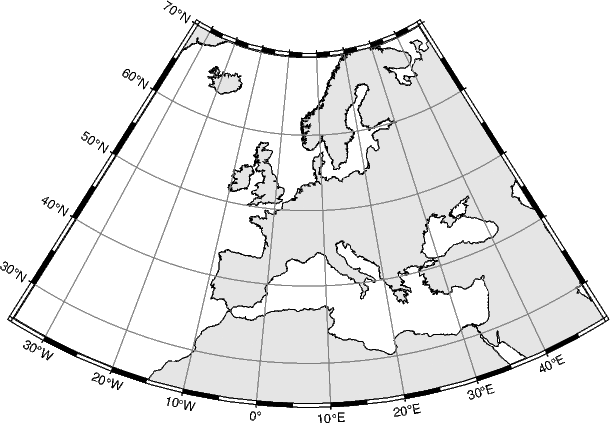

In [5]:
# a annotations, here every 10 degrees
# g grid lines, here every 10 degrees
# f frame or ticks, here every 5 degrees
# WSne annotations at South and West boundaries
frame = ["a10g10f5", "WSne"]

fig.basemap(projection=projection, region=region, frame=0)
fig.coast(
    land=color_land,
    resolution="h",  # high
    area_thresh="30000",
    shorelines="black",
)
fig.basemap(frame=frame)

fig.show(dpi=dpi_jn)

Plot the plate boundaries ([Bird 2003](https://doi.org/10.1029/2001GC000252)) using the [`pygmt.Figure.plot`](https://www.pygmt.org/v0.16.0/api/generated/pygmt.Figure.plot.html) method.

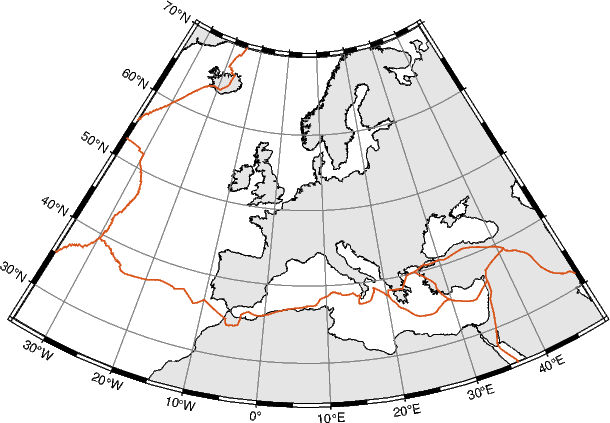

In [6]:
fig.plot(data=file_platbound, pen=f"0.8p,{color_platbound}")

fig.show(dpi=dpi_jn)

Plot the (projected) ray paths. The semi-transparency generates some kind of a ray density.

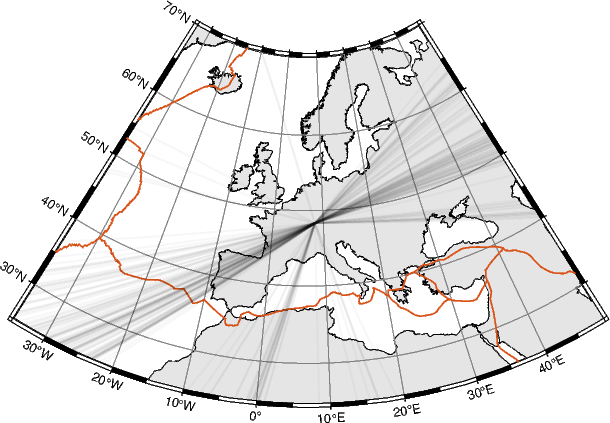

In [7]:
file_raypath_same = "data_FigS4_left_swsm/BFO_rays_swsm_"
file_raypath_K_N = f"{file_raypath_same}K_N_goodfair.txt"
file_raypath_K_NN = f"{file_raypath_same}K_NN_goodfair.txt"
file_raypath_KK_N = f"{file_raypath_same}KK_N_goodfair.txt"
file_raypath_KK_NN = f"{file_raypath_same}KK_NN_goodfair.txt"

# null, SKS
fig.plot(
    data=file_raypath_K_N,
    pen=f"1p,{color_ray_K_N}{alpha_ray}",
    incols=incols_ray,  # order of input columns, zero-based indexing
)
# null, SKKS
fig.plot(
    data=file_raypath_KK_N,
    pen=f"1p,{color_ray_KK_N}{alpha_ray}",
    incols=incols_ray,
)
# spit, SKS
fig.plot(
    data=file_raypath_K_NN,
    pen=f"1p,{color_ray_K_NN}{alpha_ray}",
    incols=incols_ray,
)
# split, SKKS
fig.plot(
    data=file_raypath_KK_NN,
    pen=f"1p,{color_ray_KK_NN}{alpha_ray}",
    incols=incols_ray,
)

fig.show(dpi=dpi_jn)

Create a cyclic colormap using the [`pygmt.makecpt`](https://www.pygmt.org/v0.16.0/api/generated/pygmt.makecpt.html) function:
* fast polarization direction: _cmocean_ colormaps - _phase_ ([Thuny et al. 2016](https://dx.doi.org/10.5670/oceanog.2016.66))

In [8]:
gmt.makecpt(
    cmap="phase",  # buld-in up on GMT 6.4.0
    series=[-90, 90],  # min, max
    cyclic=True,
)

Plot the piercing points in 2700 km depth (externally and previously calculated after the _iasp91_ Earth model ([Kennett & Engdahl 1991](https://doi.org/10.1111/j.1365-246X.1991.tb06724.x))).

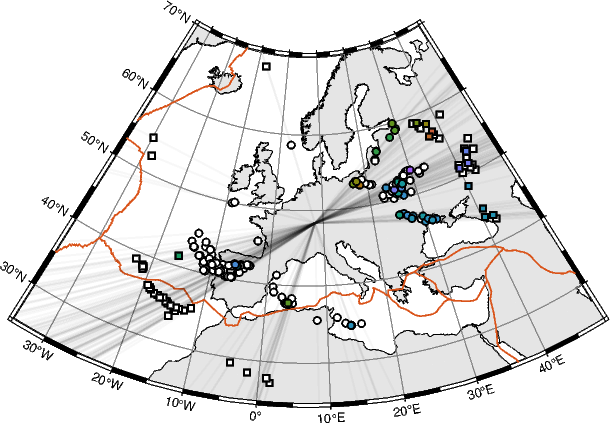

In [9]:
data_pp_same = "data_FigS4_left_swsm/BFO_pp2700km_"
data_K_N_pp = f"{data_pp_same}K_sp_N_goodfair.txt"
data_K_NN_pp = f"{data_pp_same}K_sp_NN_goodfair.txt"
data_KK_N_pp = f"{data_pp_same}KK_sp_N_goodfair.txt"
data_KK_NN_pp = f"{data_pp_same}KK_sp_NN_goodfair.txt"

# null, SKS
fig.plot(
    data=data_K_N_pp,
    style=f"C{marker_size_pp}",  # circle
    fill=color_null,  # before PyGMT v0.8.0 "color"
    pen=f"{outline_width_pp},black",  # outline thickness and color
)
# null, SKKS
fig.plot(
    data=data_KK_N_pp,
    style=f"S{marker_size_pp}",  # square
    fill=color_null,  # before PyGMT v0.8.0 "color"
    pen=f"{outline_width_pp},black",
)
# split, SKS
fig.plot(
    data=data_K_NN_pp,
    style=f"C{marker_size_pp}",
    cmap=True,  # color map
    pen=f"{outline_width_pp},black",
)
# split, SKKS
fig.plot(
    data=data_KK_NN_pp,
    style=f"S{marker_size_pp}",
    cmap=True,
    pen=f"{outline_width_pp},black",
)

fig.show(dpi=dpi_jn)

Add symbol and station code of recording station BFO as well as depth of piercing points using the [`pygmt.Figure.plot`](https://www.pygmt.org/v0.16.0/api/generated/pygmt.Figure.plot.html) and [`pygmt.Figure.text`](https://www.pygmt.org/v0.16.0/api/generated/pygmt.Figure.text.html) methods.

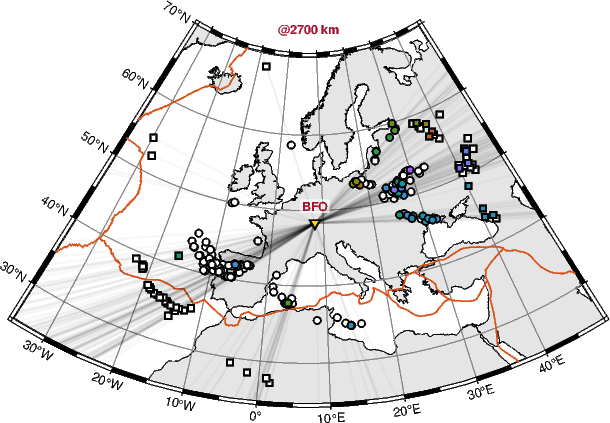

In [10]:
# -----------------------------------------------------------------------------
# Recording station BFO

# Add symbol
fig.plot(
    x=lon_BFO,
    y=lat_BFO,
    style="i0.3c",  # inverse triangle
    fill=color_station_symbol,  # before PyGMT v0.8.0 "color"
    pen="1p,black",
)

# Add station code
fig.text(
    x=lon_BFO,
    y=49.020,
    text="BFO",
    font=f"{myfontsize},Helvetica-Bold,{color_station_label}",
    offset="0c/0.3c",  # x/y
    fill="white@30",
    clearance="+tO",  # rounded edges of box
)

# -----------------------------------------------------------------------------
# Add depth of piercing points
fig.text(
    position="TC",  # Top Center
    text="@@2700 km",  # @@ outputs @ sign in GMT
    font=f"{myfontsize},Helvetica-Bold,{color_station_label}",
    fill="white@30",
)

fig.show(dpi=dpi_jn)

Add a colorbar for the colormap _phase_ used for the fast polarization direction using the [`pygmt.Figure.colorbar`](https://www.pygmt.org/v0.16.0/api/generated/pygmt.Figure.colorbar.html) method.

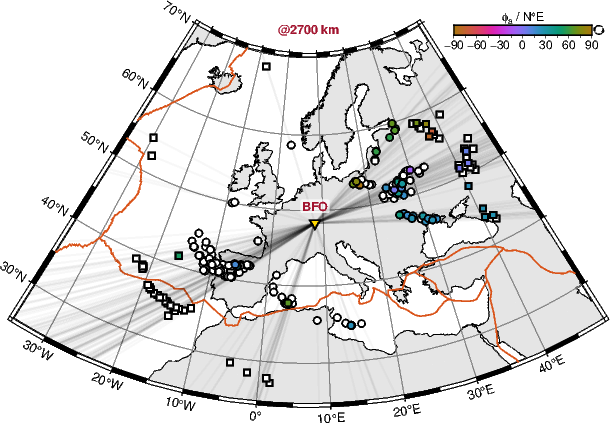

In [11]:
# a annotations, here every 30 degrees
# f frame or ticks, here every 15 degrees
# +l label
#   @~f@~  greek letter phi
#   @-a@-  subscript
#   @.     degree sign
cb_phi_frame = "a30f15+l@~f@~@-a@- / N@.E"

# J reference point, here Right Top outside of map bounding box
# +j anchor point, here Right Top
# +w width/height, here in centimeters
# +o offset x/y, here in centimeters
# +h horizontal
# +ml label on top of the colorbar
cb_phi_pos = "JRT+jRT+w3.5c/0.25c+o0.3c/0c+h+ml"

with gmt.config(FONT="18p"): 
    fig.colorbar(cmap=True, position=cb_phi_pos, frame=cb_phi_frame)

fig.show(dpi=dpi_jn)

Add legend for symbols of piercing points using the [`pygmt.Figure.legend`](https://www.pygmt.org/v0.16.0/api/generated/pygmt.Figure.legend.html) method.

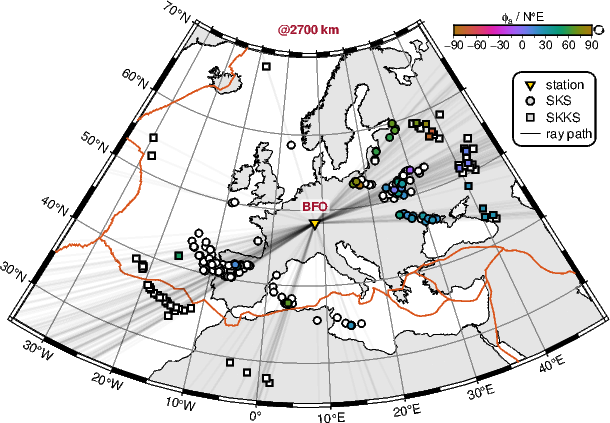

In [12]:
leg_file = "legend_gmt_swsm.txt"

# J reference point, here Right Top outside of map bounding box
# +j anchor point, here Left Top
# +w width, here in centimeters
# +o offset x/y, here in centimeters
leg_pos = "JRT+jLT+w2.1c+o-2.3c/1.2c"

fig.legend(spec=leg_file, position=leg_pos, box=box_standard)

fig.show(dpi=dpi_jn)

Using the [`pygmt.Figure.savefig`](https://www.pygmt.org/v0.7.0/api/generated/pygmt.Figure.savefig.html) method you can save the final figure. Indicate the desired file format by adding the corresponding extension to the file name passed through the `fname` parameter. For PNG format you may also set the resolution via the `dpi` parameter.

In [13]:
# Uncomment to save the figure in PNG, PDF, or EPS format
# for ext in ["png"]: #, "pdf", "eps"]:
#   fig.savefig(fname=f"{fname_fig_out}.{ext}", dpi=dpi_png)

print(fname_fig_out)

RFSG_FigS4_left_swsm
